In [2]:
import numpy as np  
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.externals import joblib
# from keras import Sequential
# from keras.layers import LSTM, Dropout, Dense
# from sklearn.linear_model import LinearRegression, SGDRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn import preprocessing 
# from xgboost import XGBRegressor, plot_importance



In [3]:
train_por = pd.read_csv('student-por.csv')
train_mat  = pd.read_csv('student-mat.csv')

In [4]:
train_por.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
train_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
train_por.shape

(649, 33)

In [7]:
train_por.dropna().shape #no null values in train_por

(649, 33)

In [8]:
train_mat.shape

(395, 33)

In [9]:
train_mat.dropna().shape #no null values in train_mat


(395, 33)

In [10]:
train_por['subject']='Portuguese'

In [11]:
train_mat['subject']='Maths'


In [12]:
train=pd.concat([train_por, train_mat], axis=0) #combining two data files with subject as discriminant column to distinguish columns

In [13]:
train.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Portuguese
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Portuguese
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,Portuguese
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Portuguese
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Portuguese


In [14]:
train.to_csv('student.csv', index=False)

In [15]:
train = pd.concat([train,pd.get_dummies(train['school'], prefix='school',dummy_na=True)],axis=1).drop(['school'],axis=1)
train = pd.concat([train,pd.get_dummies(train['sex'], prefix='sex',dummy_na=True)],axis=1).drop(['sex'],axis=1)
train = pd.concat([train,pd.get_dummies(train['address'], prefix='address',dummy_na=True)],axis=1).drop(['address'],axis=1)
train = pd.concat([train,pd.get_dummies(train['famsize'], prefix='famsize',dummy_na=True)],axis=1).drop(['famsize'],axis=1)
train = pd.concat([train,pd.get_dummies(train['Pstatus'], prefix='Pstatus',dummy_na=True)],axis=1).drop(['Pstatus'],axis=1)
train = pd.concat([train,pd.get_dummies(train['Mjob'], prefix='Mjob',dummy_na=True)],axis=1).drop(['Mjob'],axis=1)
train = pd.concat([train,pd.get_dummies(train['Fjob'], prefix='Fjob',dummy_na=True)],axis=1).drop(['Fjob'],axis=1)
train = pd.concat([train,pd.get_dummies(train['reason'], prefix='reason',dummy_na=True)],axis=1).drop(['reason'],axis=1)
train = pd.concat([train,pd.get_dummies(train['guardian'], prefix='guardian',dummy_na=True)],axis=1).drop(['guardian'],axis=1)
train = pd.concat([train,pd.get_dummies(train['schoolsup'], prefix='schoolsup',dummy_na=True)],axis=1).drop(['schoolsup'],axis=1)
train = pd.concat([train,pd.get_dummies(train['famsup'], prefix='famsup',dummy_na=True)],axis=1).drop(['famsup'],axis=1)
train = pd.concat([train,pd.get_dummies(train['paid'], prefix='paid',dummy_na=True)],axis=1).drop(['paid'],axis=1)
train = pd.concat([train,pd.get_dummies(train['activities'], prefix='activities',dummy_na=True)],axis=1).drop(['activities'],axis=1)
train = pd.concat([train,pd.get_dummies(train['nursery'], prefix='nursery',dummy_na=True)],axis=1).drop(['nursery'],axis=1)
train = pd.concat([train,pd.get_dummies(train['higher'], prefix='higher',dummy_na=True)],axis=1).drop(['higher'],axis=1)
train = pd.concat([train,pd.get_dummies(train['internet'], prefix='internet',dummy_na=True)],axis=1).drop(['internet'],axis=1)
train = pd.concat([train,pd.get_dummies(train['romantic'], prefix='romantic',dummy_na=True)],axis=1).drop(['romantic'],axis=1)
train = pd.concat([train,pd.get_dummies(train['subject'], prefix='subject',dummy_na=True)],axis=1).drop(['subject'],axis=1);




In [16]:
train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,higher_nan,internet_no,internet_yes,internet_nan,romantic_no,romantic_yes,romantic_nan,subject_Maths,subject_Portuguese,subject_nan
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,0,1,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,1,0,1,0,0,0,1,0
2,15,1,1,1,2,0,4,3,2,2,...,0,0,1,0,1,0,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,0,1,0,0,1,0,0,1,0
4,16,3,3,1,2,0,4,3,2,1,...,0,1,0,0,1,0,0,0,1,0


In [17]:

train = train.drop(['sex_nan'],axis=1)
train = train.drop(['address_nan'],axis=1)
train = train.drop(['famsize_nan'],axis=1)
train = train.drop(['Pstatus_nan'],axis=1)
train = train.drop(['Mjob_nan'],axis=1)
train = train.drop(['Fjob_nan'],axis=1)
train = train.drop(['reason_nan'],axis=1)
train = train.drop(['guardian_nan'],axis=1)
train = train.drop(['schoolsup_nan'],axis=1)
train = train.drop(['famsup_nan'],axis=1)
train = train.drop(['paid_nan'],axis=1)
train = train.drop(['activities_nan'],axis=1)
train = train.drop(['nursery_nan'],axis=1)
train = train.drop(['higher_nan'],axis=1)
train = train.drop(['internet_nan'],axis=1)
train = train.drop(['romantic_nan'],axis=1)
train = train.drop(['subject_nan'],axis=1);

In [18]:
train.head()
train.to_csv('students.csv', index=False)
data = pd.read_csv('students.csv')
data.head()
data['FinalGrade'] = 'na'
data.loc[(data.G3 >= 18) & (data.G3 <= 20), 'FinalGrade'] = 'Excellent'
data.loc[(data.G3 >= 15) & (data.G3 <= 17), 'FinalGrade'] = 'Good' 
data.loc[(data.G3 >= 11) & (data.G3 <= 14), 'FinalGrade'] = 'Satisfactory' 
data.loc[(data.G3 >= 6) & (data.G3 <= 10), 'FinalGrade'] = 'Poor' 
data.loc[(data.G3 >= 0) & (data.G3 <= 5), 'FinalGrade'] = 'Failure' 

data.loc[(data.G1 >= 18) & (data.G1 <= 20), 'Grade1'] = 'Excellent'
data.loc[(data.G1 >= 15) & (data.G1 <= 17), 'Grade1'] = 'Good' 
data.loc[(data.G1 >= 11) & (data.G1 <= 14), 'Grade1'] = 'Satisfactory' 
data.loc[(data.G1 >= 6) & (data.G1 <= 10), 'Grade1'] = 'Poor' 
data.loc[(data.G1 >= 0) & (data.G1 <= 5), 'Grade1'] = 'Failure' 



data.loc[(data.G2 >= 18) & (data.G2 <= 20), 'Grade2'] = 'Excellent'
data.loc[(data.G2 >= 15) & (data.G2 <= 17), 'Grade2'] = 'Good' 
data.loc[(data.G2 >= 11) & (data.G2 <= 14), 'Grade2'] = 'Satisfactory' 
data.loc[(data.G2 >= 6) & (data.G2 <= 10), 'Grade2'] = 'Poor' 
data.loc[(data.G2 >= 0) & (data.G2 <= 5), 'Grade2'] = 'Failure' 

data.head(5)
train=data
lb=LabelEncoder()
lb.fit(train['FinalGrade'])
train['FinalGrade']=lb.transform(train['FinalGrade'])
lb.fit(train['Grade2'])
train['Grade2']=lb.transform(train['Grade2'])
lb.fit(train['Grade1'])
train['Grade1']=lb.transform(train['Grade1'])

In [19]:
y=train[['FinalGrade']]
train = train.drop(['G3'],axis=1);
train = train.drop(['FinalGrade'],axis=1);
train = train.drop(['G2'],axis=1);
train = train.drop(['G1'],axis=1);

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train,y,random_state=0)

In [21]:
y_train.shape

(783, 1)

In [22]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import mean_squared_error,log_loss,roc_auc_score,accuracy_score,confusion_matrix
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_val)
y_predict=lr.predict_proba(x_val)


/home/rohith/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rohith/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rohith/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [23]:
# y_pred=y_pred.astype('int')


In [24]:
log_loss(y_val,y_predict)

0.800102388931476

In [25]:
#accuracy_score(y,y_pred)

In [26]:
# lr.score(x_val, y_val)

In [27]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()

svc.fit(x_train, y_train)

y_pred = svc.predict(x_val)



/home/rohith/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rohith/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [28]:
accuracy_score(y_val,y_pred)

0.7279693486590039

In [29]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

random_forest = RandomForestClassifier(n_estimators=100,min_samples_leaf=2)

random_forest.fit(x_train, y_train)

y_pred_prob = random_forest.predict_proba(x_val)
y_pred= random_forest.predict(x_val)


/home/rohith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [30]:
accuracy_score(y_val,y_pred)

0.7739463601532567

In [31]:
#log_loss(y_val,y_pred_prob)

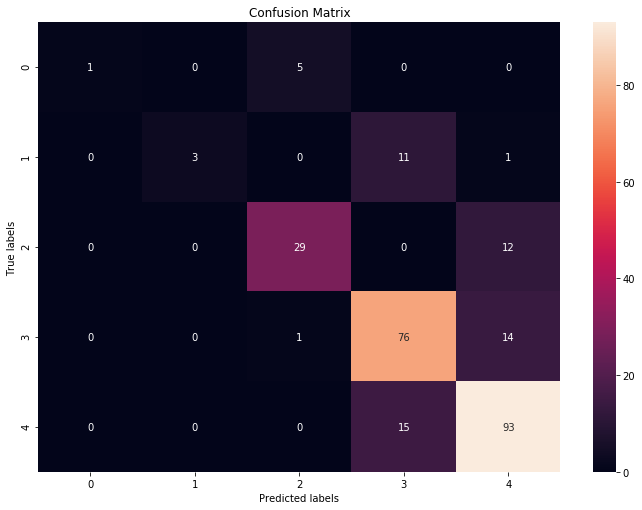

In [32]:
labels = list(range(0,24))
import seaborn as sns    
cm=confusion_matrix(y_val,y_pred)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [188]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

total = lambda x : x.sum()/5
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print('percentage of sensitivity = '+str(total(TPR)*100))

# Specificity or true negative rate
TNR = TN/(TN+FP) 

# Precision or positive predictive value
PPV = TP/(TP+FP)
print('percentage of precision = '+str(total(PPV)*100))
# Negative predictive value
NPV = TN/(TN+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# False negative rate
FNR = FN/(TP+FN)

# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('Accuracy percentage = '+str(total(ACC)*100))

percentage of sensitivity = 55.40519372226689
percentage of precision = 86.9733893557423
Accuracy percentage = 90.95785440613027


In [80]:
y_pred.shape

(261,)

In [84]:
y_val.shape

(261, 1)

In [97]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

train = pd.read_csv('features.csv')
train.head()
y=train[['FinalGrade']]
train = train.drop(['G3'],axis=1);
train = train.drop(['FinalGrade'],axis=1);
train = train.drop(['G2'],axis=1);
train = train.drop(['G1'],axis=1);
# y

In [99]:
y = label_binarize(y, classes=['Failure','Poor','Satisfactory','Good','Excellent'])
n_classes = y.shape[1]
y.shape

(1044, 5)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(train,y,random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = classifier.fit(x_train, y_train).decision_function(x_val)
y_score.shape

(261, 5)

In [103]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

[]

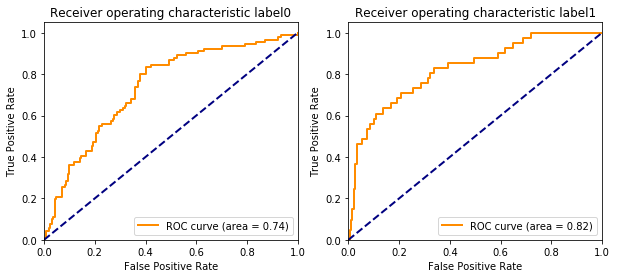

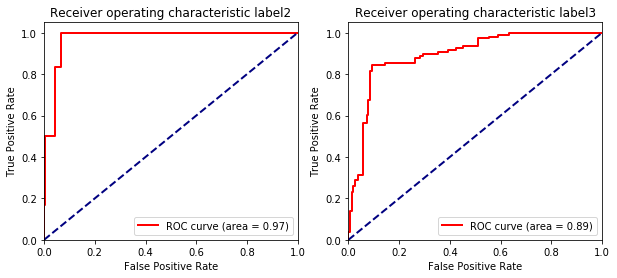

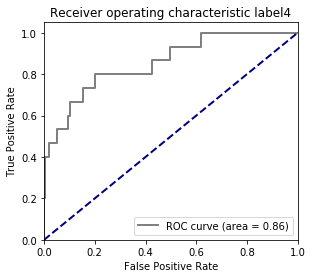

In [177]:
plt.figure()
lw = 2
for i in (0,1):
    plt.subplot(1,2,i+1)
    plt.plot(fpr[i], tpr[i], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic label'+str(i))
    plt.legend(loc="lower right")

plt.plot()

plt.figure()
lw = 2
for i in (2,3):
    plt.subplot(1,2,i-1)
    plt.plot(fpr[i], tpr[i], color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic label'+str(i))
    plt.legend(loc="lower right")

plt.plot()

plt.figure()
lw = 2
plt.subplot(1,2,1)
plt.plot(fpr[4], tpr[4], color='grey',
     lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[4])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic label'+str(4))
plt.legend(loc="lower right")
plt.plot()

Area Under the Curve with label 0 is 0.7366515837104073
Area Under the Curve with label 1 is 0.8226164079822617
Area Under the Curve with label 2 is 0.9732026143790851
Area Under the Curve with label 3 is 0.8939724037763254
Area Under the Curve with label 4 is 0.8550135501355014


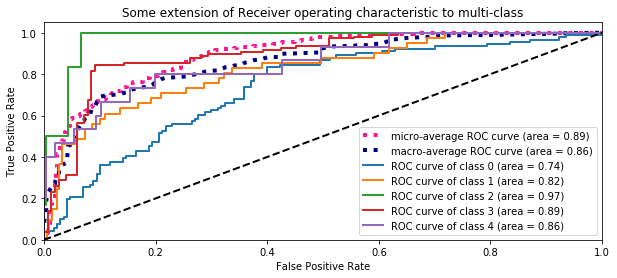

In [178]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    print('Area Under the Curve with label '+str(i)+' is '+str(roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (10,6)

In [196]:
from sklearn.metrics import f1_score, recall_score, classification_report
print('f score = ' + str(f1_score(y_val, y_pred, average="macro")))
print('percentage of recall score = '+str(recall_score(y_val, y_pred, average="macro"))) 

f score = 0.5971119508616101
percentage of recall score = 0.5540519372226689


In [197]:
target_names = ['Failure','Poor','Satisfactory','Good','Excellent']
print(classification_report(y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Failure       1.00      0.17      0.29         6
        Poor       1.00      0.20      0.33        15
Satisfactory       0.83      0.71      0.76        41
        Good       0.75      0.84      0.79        91
   Excellent       0.78      0.86      0.82       108

   micro avg       0.77      0.77      0.77       261
   macro avg       0.87      0.55      0.60       261
weighted avg       0.79      0.77      0.76       261



In [199]:
from sklearn.metrics import fbeta_score
fbeta_score(y_val,y_pred,average='macro', beta=0.5)

0.6817999801108086